In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
IMAGE_SIZE = [224, 224]



In [ ]:
train_dir = "/content/drive/MyDrive/vgg16/men_women/train"
val_dir = "/content/drive/MyDrive/vgg16/men_women/test"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Working with 500 images
Image examples: 
00000800.jpg


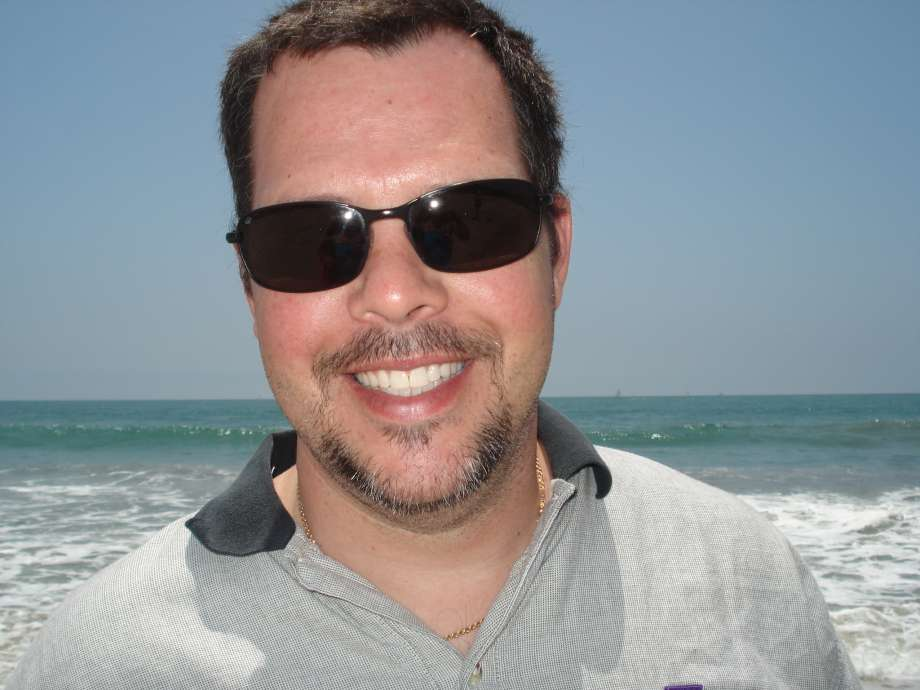

00000563.jpg


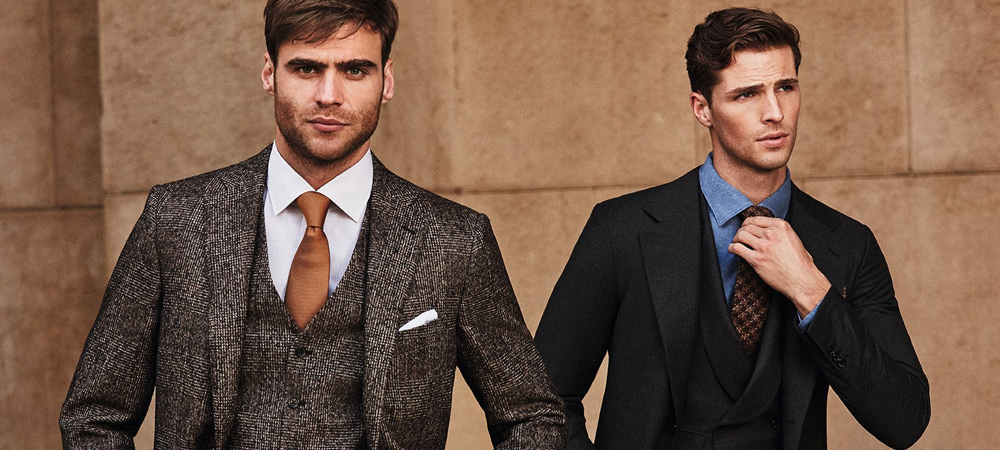

00000622.jpg


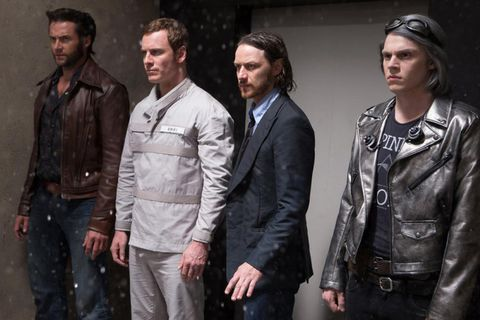

00000801.jpg


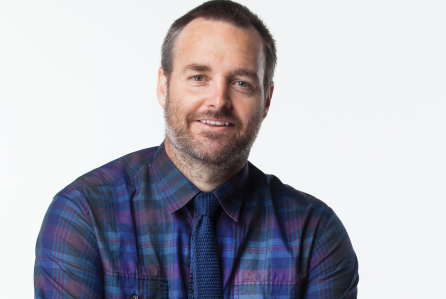

00000835.jpeg


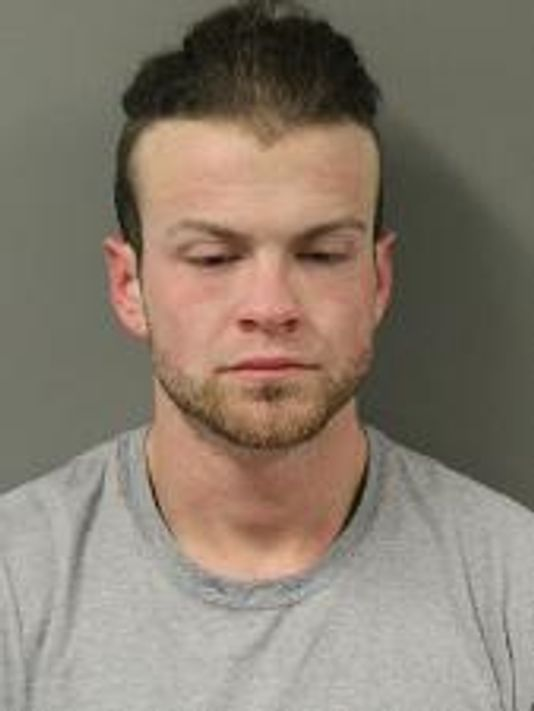

00000684.jpg


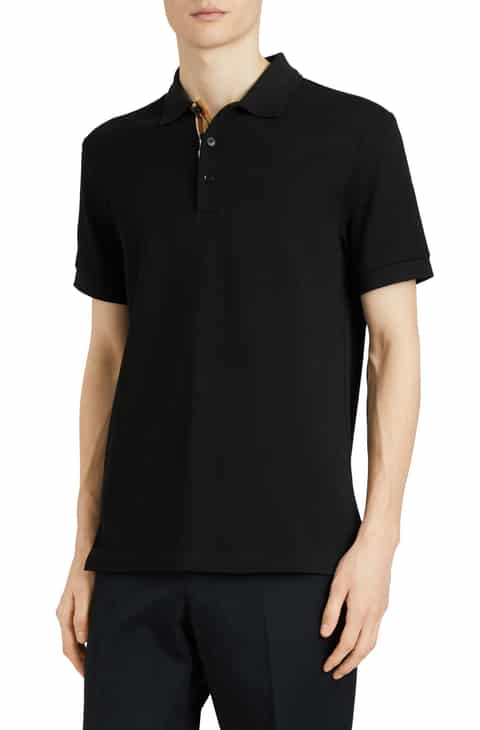

00000535.jpg


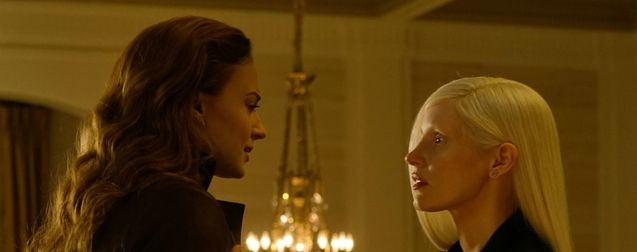

00000841.jpg


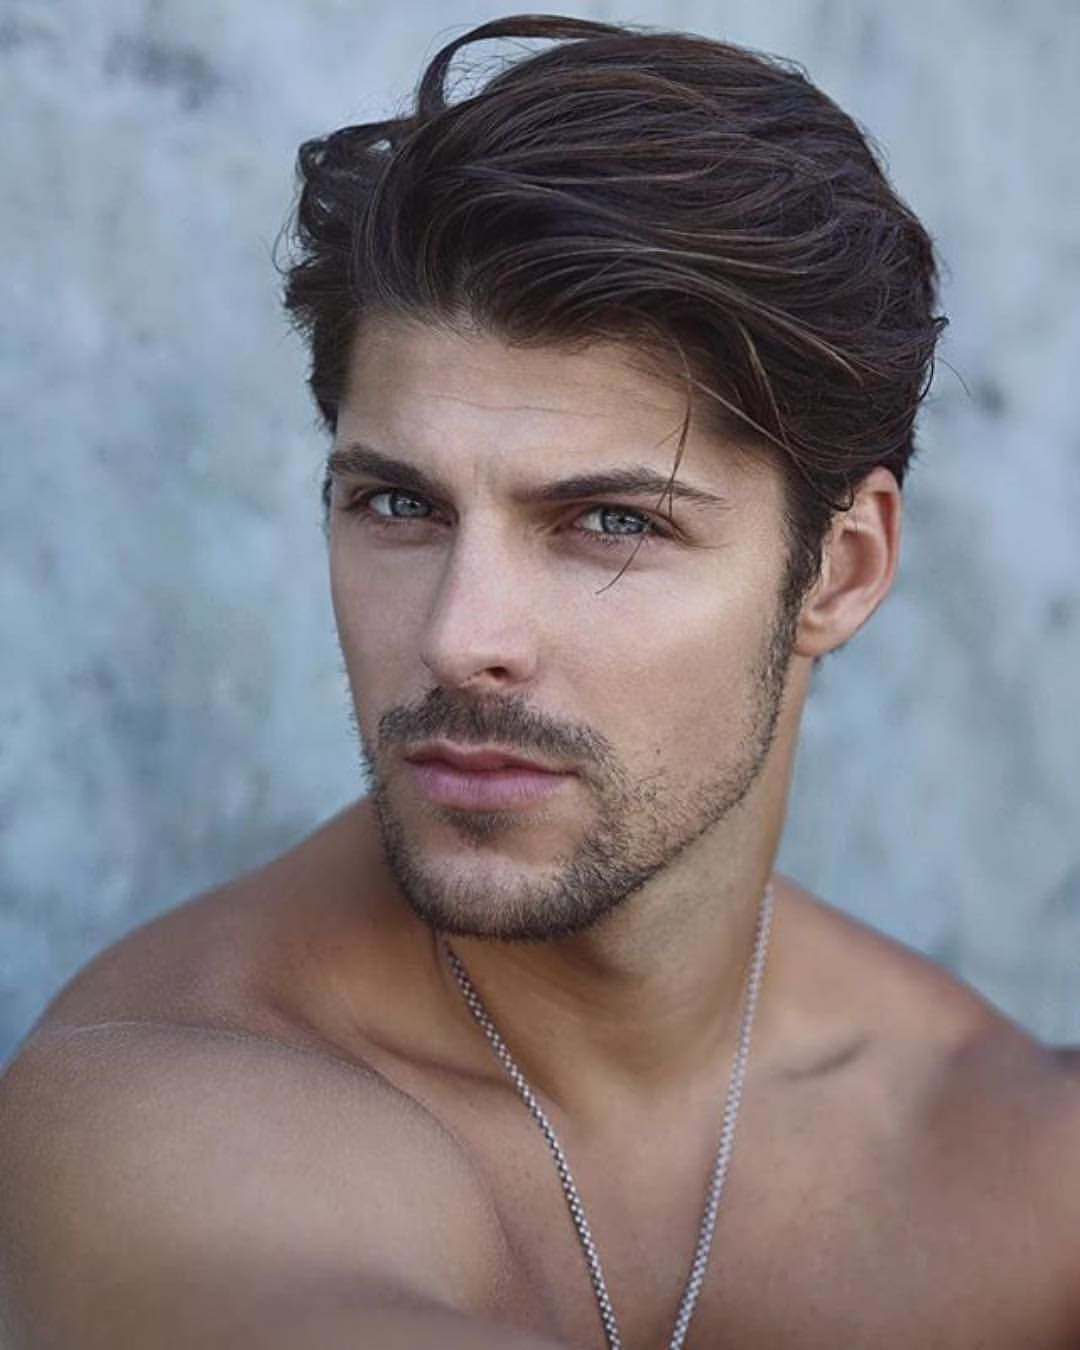

00000833.jpg


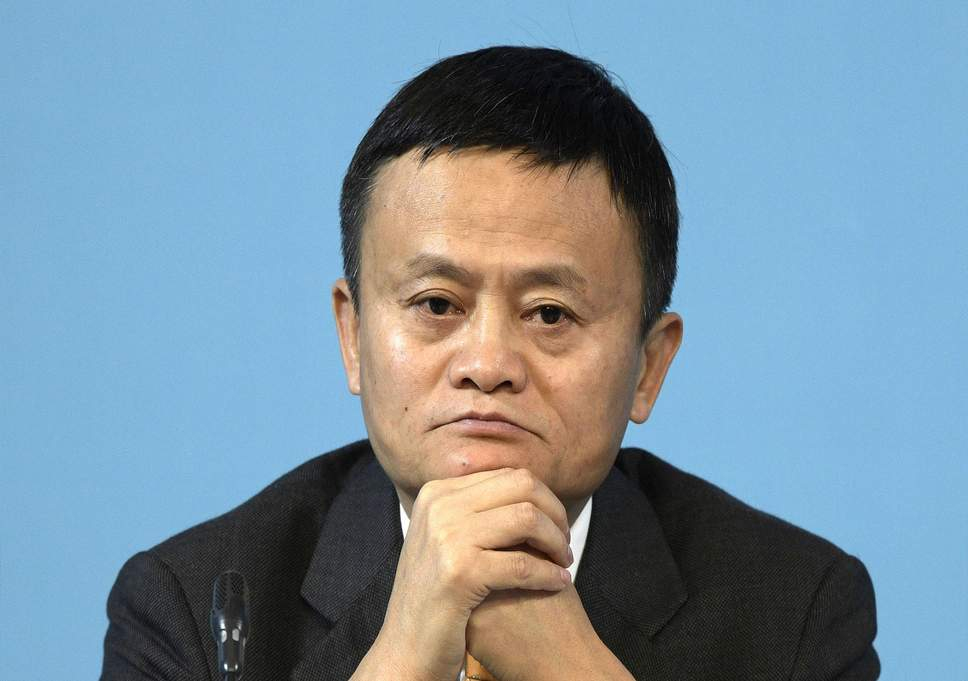

00000703.gif


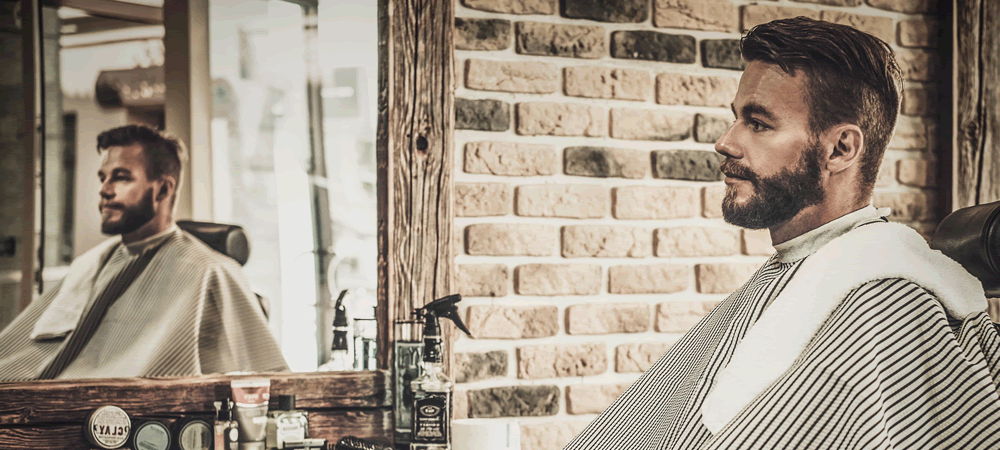

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_dir+'/men500'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10,20):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_10')>

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale=1./255)


In [ ]:
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    rescale=1./255)

In [ ]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 995 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 259 images belonging to 2 classes.


In [ ]:
num_classes = 2

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   pooling='avg',classes= num_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_18 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_20 (ModuleWr  (None, 2)                1026      
 apper)                                                          
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

history = resnet_model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator                      
                              #steps_per_epoch=len(train_generator),
                              #validation_steps=len(validation_generator)
                              )

Epoch 1/10
32/32 [==============================] - 28s 807ms/step - loss: 0.6865 - accuracy: 0.5427 - val_loss: 0.6747 - val_accuracy: 0.5714
Epoch 2/10
32/32 [==============================] - 25s 799ms/step - loss: 0.6694 - accuracy: 0.5970 - val_loss: 0.6619 - val_accuracy: 0.5985
Epoch 3/10
32/32 [==============================] - 24s 761ms/step - loss: 0.6614 - accuracy: 0.6121 - val_loss: 0.6563 - val_accuracy: 0.5907
Epoch 4/10
32/32 [==============================] - 24s 767ms/step - loss: 0.6392 - accuracy: 0.6402 - val_loss: 0.6421 - val_accuracy: 0.6255
Epoch 5/10
32/32 [==============================] - 24s 768ms/step - loss: 0.6356 - accuracy: 0.6352 - val_loss: 0.6437 - val_accuracy: 0.6139
Epoch 6/10
32/32 [==============================] - 24s 750ms/step - loss: 0.6325 - accuracy: 0.6241 - val_loss: 0.6311 - val_accuracy: 0.6448
Epoch 7/10
32/32 [==============================] - 24s 759ms/step - loss: 0.6274 - accuracy: 0.6352 - val_loss: 0.6442 - val_accuracy: 0.6139

##Plot train vs test

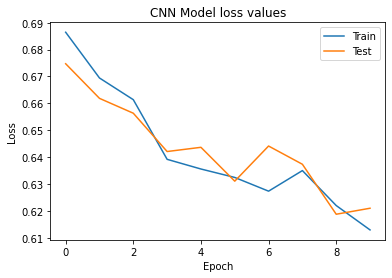

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

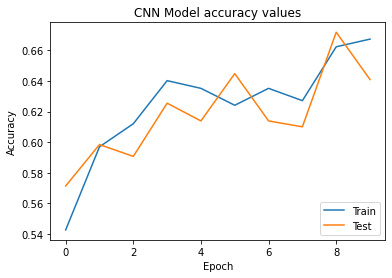

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Making Predictions

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
def predict_img(img):
  img = tf.keras.utils.load_img(img,target_size=(224,224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  #from keras.models import load_model
  #saved_model = load_model("/content/drive/MyDrive/resnet50_evaluation/ResNet_50.ipynb")

  output = resnet_model.predict(img)
  if output[0][0] > output[0][1]:
      print("men")
  else:
      print('women')

1/1 [==============================] - 1s 790ms/step
men


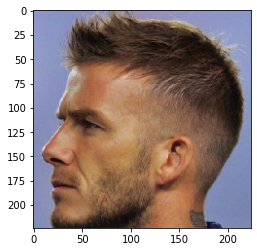

In [ ]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/men/00000402.jpg")

##For augmented dataset

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = "/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/train"
test_path = "/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/test"

Working with 499 images
Image examples: 
men500_original_00001076.jpg_fc490742-af13-44b8-a309-a688934e7d0b.jpg


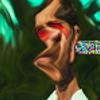

men500_original_00000859.jpg_052010b2-8b24-4fc9-a81e-68616b6cb9ed.jpg


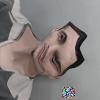

men500_original_00001130.jpg_b77e9a60-bf41-4ebb-a694-9b61752577e2.jpg


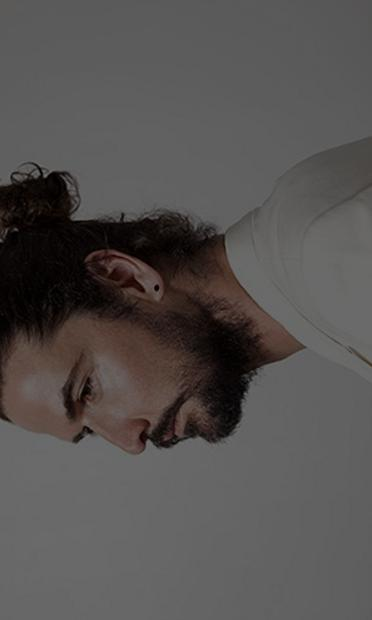

men500_original_00001225.jpg_ab0fc88b-cfc9-442e-8da4-44798f1af5de.jpg


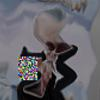

men500_original_00000882.jpg_94317281-57c1-477e-a686-7566d6c52ba9.jpg


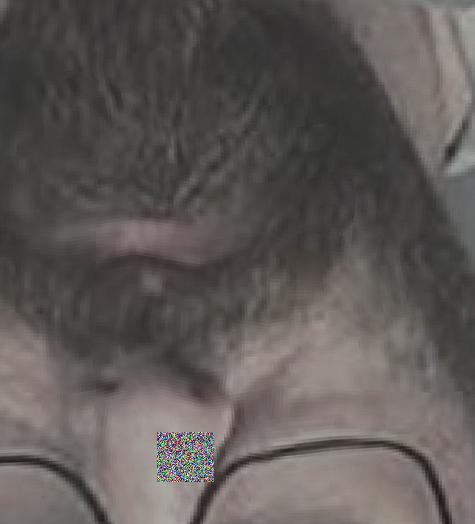

men500_original_00000667.jpg_d22dc7e1-db36-44fa-856e-7d924427fa38.jpg


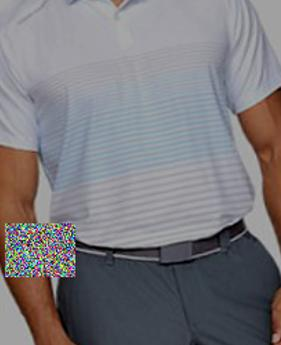

men500_original_00000994.png_6c437614-f6ec-4828-b081-d77f5f6c7d4b.png


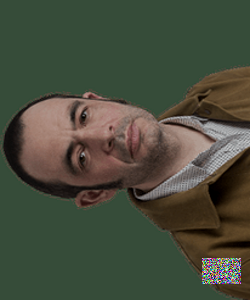

men500_original_00001004.jpg_36bbc023-bdbc-4c58-9162-e03d91ae53b5.jpg


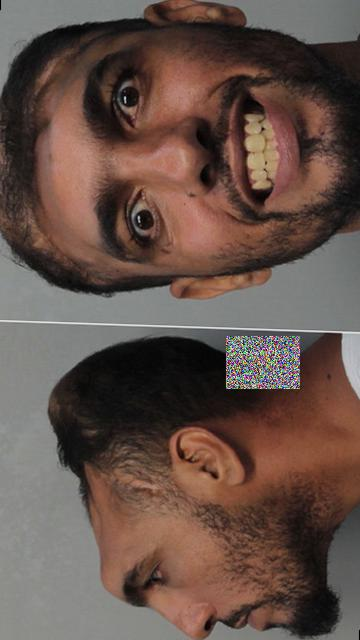

men500_original_00000818.jpg_04108b09-9237-40e1-84f8-3d8cfcce432c.jpg


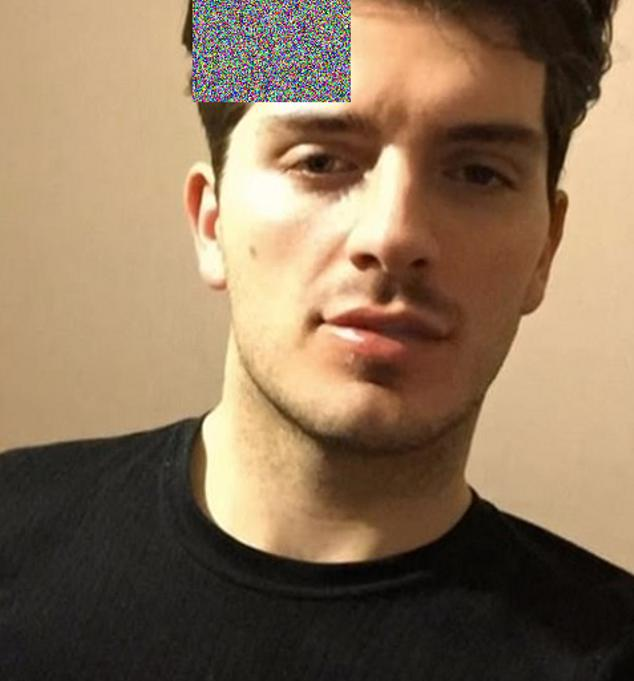

men500_original_00001258.jpg_a70ec434-b504-4dd2-b5f7-86e56cddc520.jpg


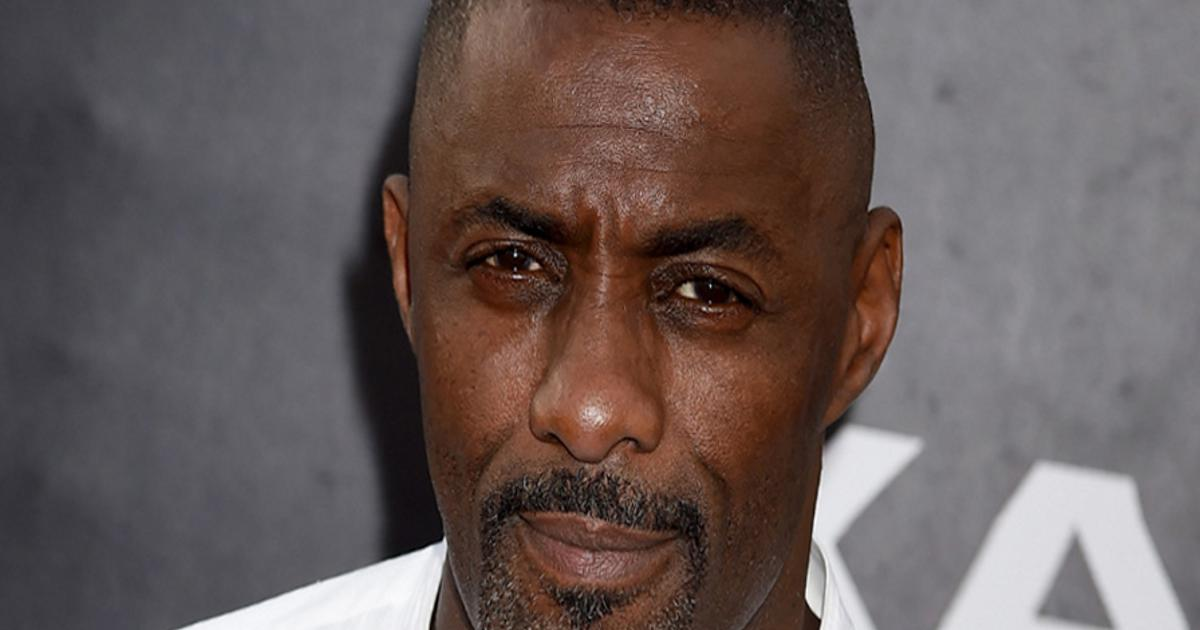

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/men'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10,20):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_6')>

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale=1./255)


In [ ]:
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    rescale=1./255)

In [ ]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 995 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 259 images belonging to 2 classes.


In [ ]:
num_classes = 2

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   pooling='avg',classes= num_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_12 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 2)                1026      
 apper)                                                          
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator                      
                              #steps_per_epoch=len(train_generator),
                              #validation_steps=len(validation_generator)
                              )

Epoch 1/10
32/32 [==============================] - 28s 810ms/step - loss: 0.7429 - accuracy: 0.5819 - val_loss: 0.6410 - val_accuracy: 0.6216
Epoch 2/10
32/32 [==============================] - 24s 773ms/step - loss: 0.6467 - accuracy: 0.6191 - val_loss: 0.6108 - val_accuracy: 0.6718
Epoch 3/10
32/32 [==============================] - 24s 771ms/step - loss: 0.6365 - accuracy: 0.6352 - val_loss: 0.6255 - val_accuracy: 0.6448
Epoch 4/10
32/32 [==============================] - 25s 798ms/step - loss: 0.6569 - accuracy: 0.6281 - val_loss: 0.6205 - val_accuracy: 0.6371
Epoch 5/10
32/32 [==============================] - 24s 762ms/step - loss: 0.6396 - accuracy: 0.6442 - val_loss: 0.6040 - val_accuracy: 0.6680
Epoch 6/10
32/32 [==============================] - 24s 749ms/step - loss: 0.6811 - accuracy: 0.6141 - val_loss: 0.5945 - val_accuracy: 0.6795
Epoch 7/10
32/32 [==============================] - 24s 744ms/step - loss: 0.6164 - accuracy: 0.6593 - val_loss: 0.6408 - val_accuracy: 0.6255

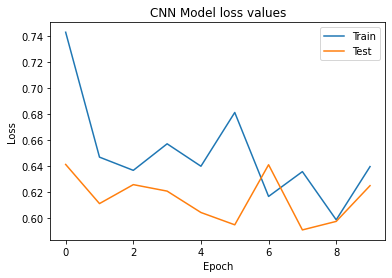

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

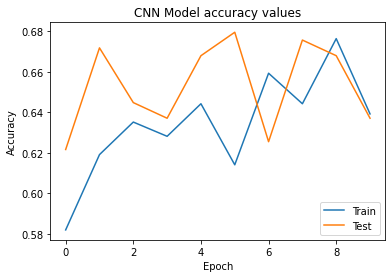

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
def predict_img(img):
  img = tf.keras.utils.load_img(img,target_size=(224,224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  #from keras.models import load_model
  #saved_model = load_model("/content/drive/MyDrive/resnet50_evaluation/ResNet_50.ipynb")

  output = resnet_model.predict(img)
  if output[0][0] > output[0][1]:
      print("men")
  else:
      print('women')

1/1 [==============================] - 1s 1s/step
men


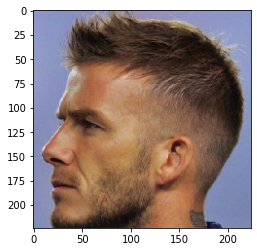

In [ ]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/men/00000402.jpg")